In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ISLP
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
auto = ISLP.load_data("auto")

In [7]:
y=auto["mpg"]
design = MS(['horsepower'])
X = design.fit_transform(auto)

In [ ]:
model = sm.OLS(y, X);
results = model.fit();
b = results.params[0];
m = results.params[1];

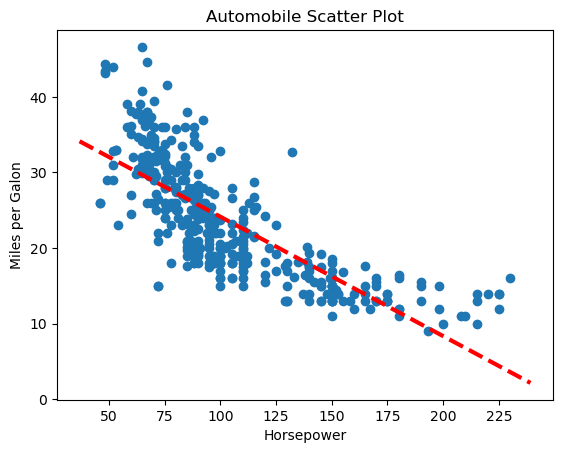

In [29]:
fig, ax = plt.subplots()
ax.scatter(X["horsepower"],y)
ax.set_title("Automobile Scatter Plot")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Miles per Galon")
xlim = ax.get_xlim()
ylim = [m * xlim[0] + b, m * xlim[1] + b]
ax.plot(xlim, ylim, 'r--', linewidth=3)
plt.show()

In [30]:
to_predict = pd.DataFrame([98], columns=['horsepower'])
to_predict = design.transform(to_predict)
predictions = results.get_prediction(to_predict)

In [31]:
predictions.predicted_mean
predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

<Axes: >

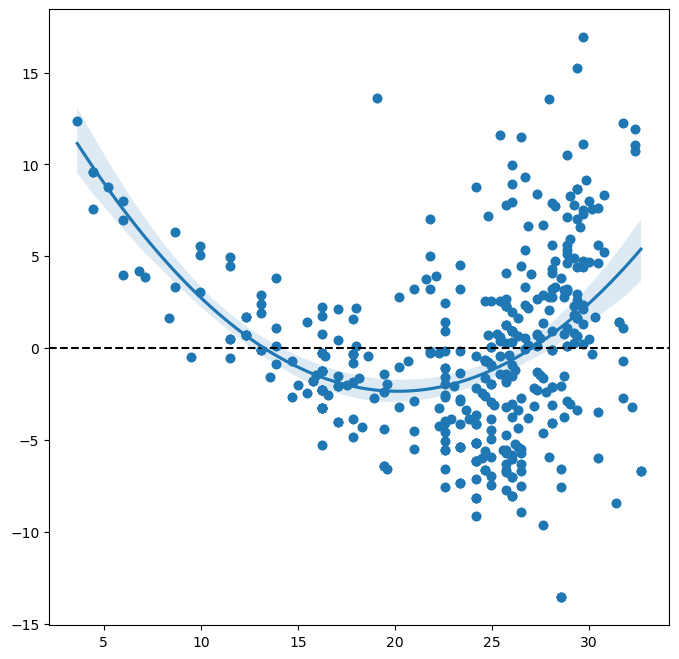

In [41]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');
sns.regplot(x=results.fittedvalues, y=results.resid, order=2)

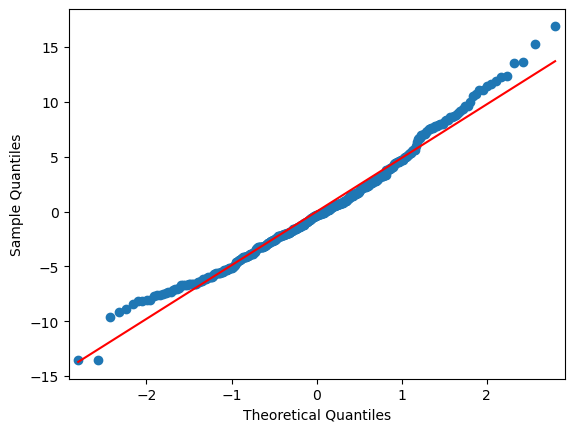

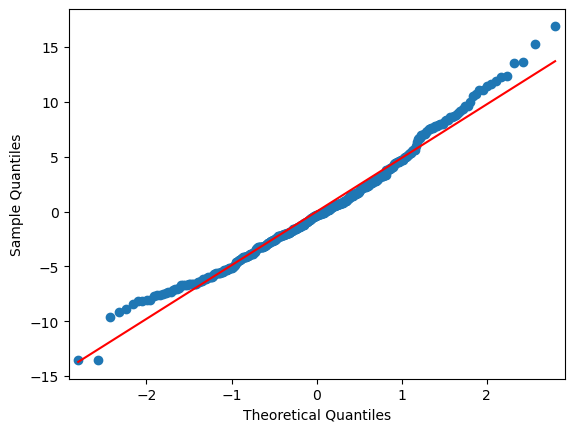

In [44]:
sm.qqplot(results.resid, line='s')

13

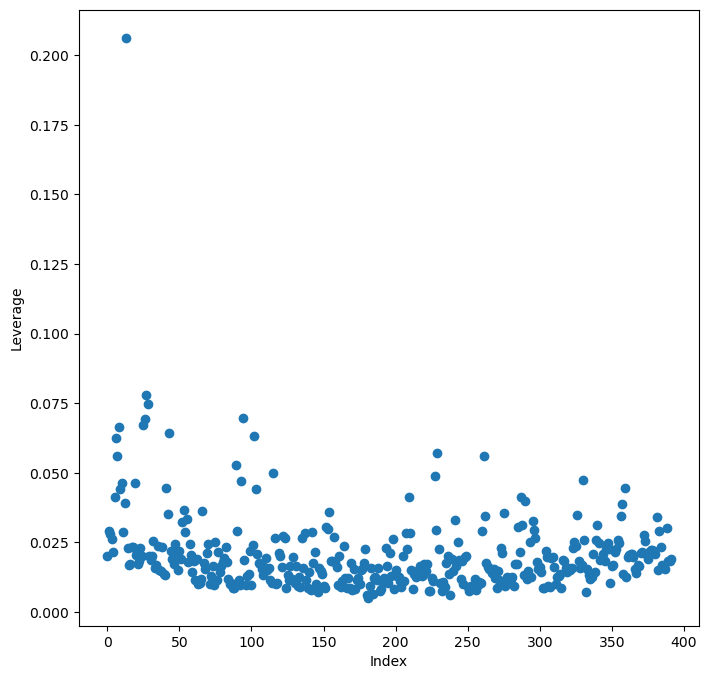

In [50]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

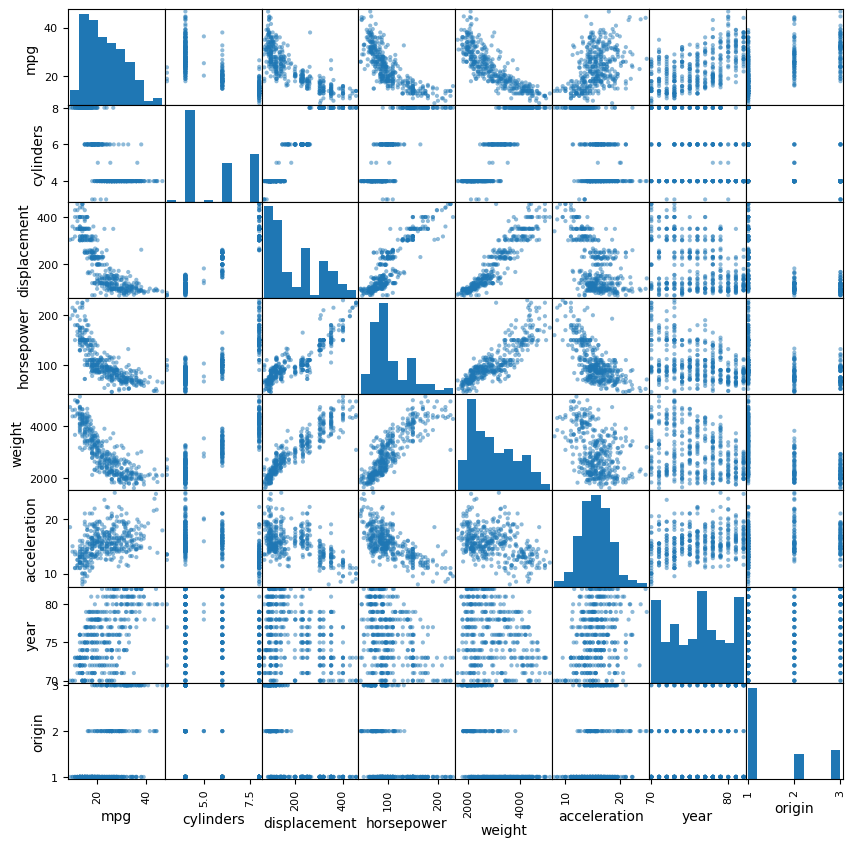

In [51]:
pd.plotting.scatter_matrix(auto, figsize=(10,10));

<Axes: >

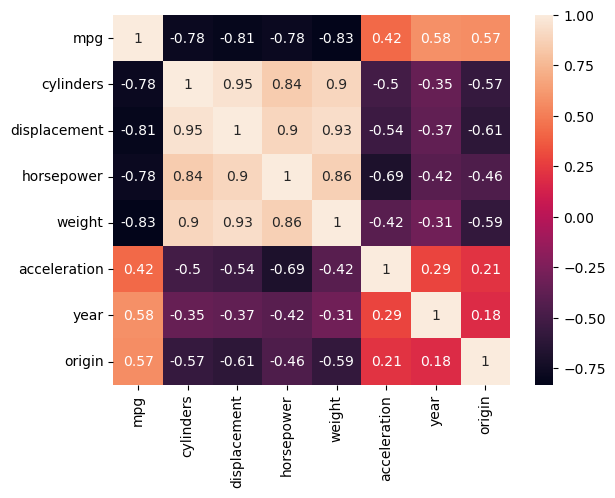

In [52]:
import seaborn as sns
corr = auto.drop('name', axis=1).corr()
sns.heatmap(corr, annot=True)

In [71]:
import math
transformed_auto = auto.copy();
for i in auto.select_dtypes(include='number').columns:
    # transformed_auto[f'{i}_squared'] = auto[i] ** 2
    # transformed_auto[f'{i}_sqrt'] =  auto[i] ** (1/2)
    # transformed_auto[f'{i}_log'] = np.log(auto[i])
    pass

In [72]:
import itertools
y=auto["mpg"]

values = list(transformed_auto.drop(['name', 'mpg', 'acceleration', 'cylinders'], axis=1).columns)
#design = MS(values)
#design = MS(values + list(itertools.combinations(values, 2)))
design = MS(values + [("displacement","weight"),("horsepower","year")])
X = design.fit_transform(transformed_auto)

In [73]:
model = sm.OLS(y, X);
results = model.fit();

In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     381.8
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          1.18e-168
Time:                        22:29:16   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1925.
Df Residuals:                     384   BIC:                             1957.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             -65.8545      9.616     -6.848      0.000     -84.761     -46.948
displacement           -0.0553      0.009     -6.339      0.000      -0.072      -0.038
horsepower              0.5759      0.089      6.493      0.000       0.402       0.750
weight                 -0.0089      0.001    -13.872      0.000      -0.010      -0.008
year                    1.5722      0.121     12.976      0.000       1.334       1.810
origin                  0.5825      0.244      2.389      0.017       0.103       1.062
displacement:weight  1.826e-05   2.17e-06      8.422      0.000     1.4e-05    2.25e-05
horsepower:year        -0.0084      0.001     -6.969      0.000      -0.011      -0.006
==============================================================================
Omnibus:                       41.716   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.114
Skew:                           0.556   Prob(JB):                     2.22e-21
Kurtosis:                       5.142   Cond. No.                     5.75e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# See : https://islp.readthedocs.io/en/latest/models/anova.html 
df = anova_lm(*[sm.OLS(y, D).fit() for D in design.build_sequence(transformed_auto, anova_type='sequential')])
df.index = design.names
df

<Axes: >

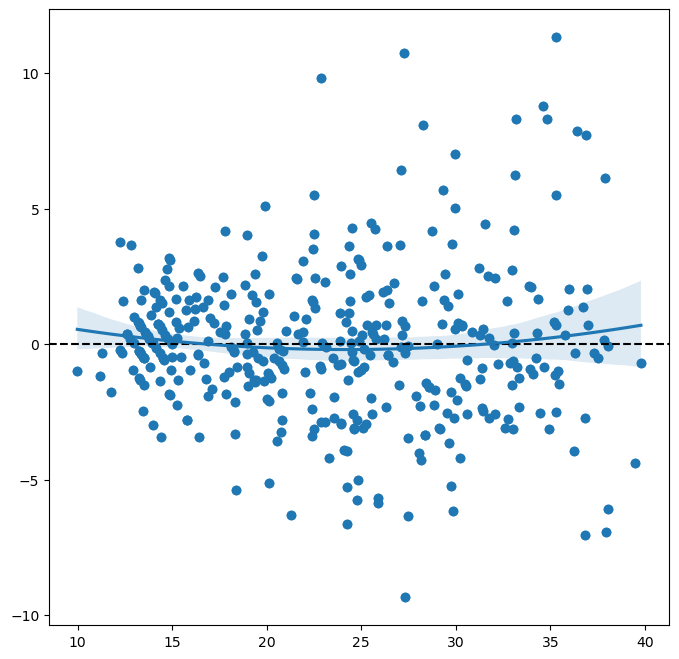

In [76]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');
sns.regplot(x=results.fittedvalues, y=results.resid, order=2)

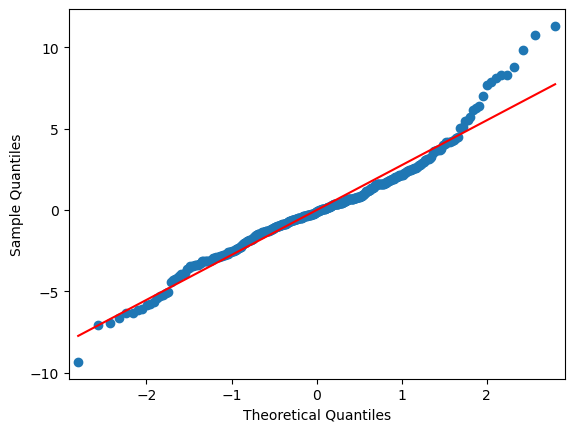

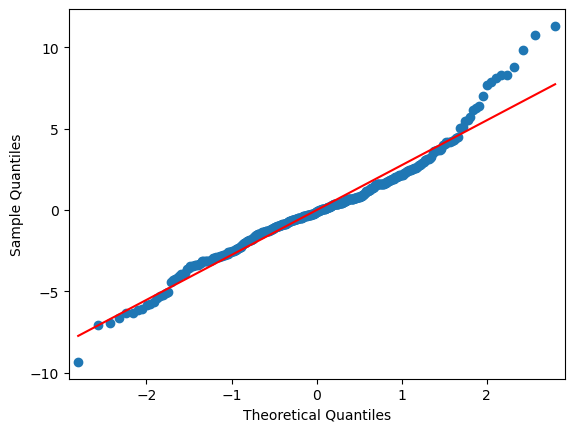

In [77]:
sm.qqplot(results.resid, line='s')